# Working with Fingerprint Files

The examples here require 
* `rdkit` and `pandas`
* a fingerprint file (`'FFI-0-1000000.csv'`)here  downloaded from https://2019-ncovgroup.github.io/data/

In [13]:
import pandas as pd
import base64
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem import Draw
from operator import itemgetter

In [3]:
data_file = 'FFI-0-1000000.csv'
df = pd.read_csv(data_file,
                 names=["dataset","name","smiles","fingerprint"])
df.head()

,dataset,name,smiles,fingerprint
0,FFI,Abacavir,NC1=NC2=C(N=CN2[C@@H]2C[C@H](CO)C=C2)C(NC2CC2)=N1,4P///wAIAAAuAAAAEhhyXoI2TOg8fNAO9GBi7AoEphhkFl...
1,FFI,Abiraterone,CC(=O)O[C@H]1CC[C@]2(C)C3CC[C@@]4(C)C(CC=C4C4=...,4P///wAIAAA2AAAADhDMUigGWDIEsjZ0hBwCDoguNlhQjF...
2,FFI,Acamprosate,CC(=O)NCCCS(O)(=O)=O,4P///wAIAAAWAAAAoOhe0AkA3HIgfpZ5AGROTmy2gQCMDQ...
3,FFI,Acarbose,C[C@H]1O[C@H](O[C@@H]2[C@@H](CO)O[C@H](O[C@@H]...,4P///wAIAAAyAAAAiBaaCiwULpDgLnA6cEJaTAwUEKg6Ig...
4,FFI,Acebutolol,CCCC(=O)NC1=CC(C(C)=O)=C(OCC(O)CNC(C)C)C=C1,4P///wAIAAAvAAAAAk5MGi5kHAxGbhQdAD5K0lYOSKwWGE...


# Decode a Fingerprint and Create a Bitvector in RDKit

In [4]:
fingerprint = '4P///wAIAAAuAAAAEhhyXoI2TOg8fNAO9GBi7AoEphhkFl4QHAaIZhoMFmyOCHQCKCAOMFh6NgkAIsKY'
dec = base64.b64decode(fingerprint)
bv = DataStructs.ExplicitBitVect(dec)
bv

# Build a Set of All Fingerprints in the File

In [6]:
fingerprint_set = []
for i, (dataset,name, smiles, fingerprint) in df.iterrows():
    # Next TRY here as some do not convert
    try:
        bv = DataStructs.ExplicitBitVect(base64.b64decode(fingerprint))
    except:
        bv = None
    fingerprint_set += [(smiles, bv)]

# Find Similar Molecules
Find molecules similar to `smiles`

Find the top `top_n_matches` of similar molecules

In [11]:
smiles = 'OCCN1CCN(CC\\C=C2\\C3=CC=CC=C3SC3=C2C=C(Cl)C=C3)CC1' 
top_n_matches = 5

best_so_far = [('', 0.0) for index in range(top_n_matches)]
bit_target = bv

# Find scores for non-None fingerprints in fingerprint set
results = {}
scores = []
for (smile, fingerprint) in fingerprint_set:
    try:
        score = DataStructs.TanimotoSimilarity(fingerprint, bit_target)
        scores += [(smile, score)]
    except:
        pass

sorted_scores = sorted(scores, key=itemgetter(1))
results[smiles] = sorted_scores[-top_n_matches:]

In [12]:
results

{'OCCN1CCN(CC\\C=C2\\C3=CC=CC=C3SC3=C2C=C(Cl)C=C3)CC1': [('CN1CCN(CCCN2C3=CC=CC=C3SC3=C2C=C(Cl)C=C3)CC1',
   0.4166666666666667),
  ('OCCN1CCN(CCCN2C3=CC=CC=C3SC3=C2C=C(Cl)C=C3)CC1', 0.5357142857142857),
  ('CN(C)S(=O)(=O)C1=CC2=C(SC3=CC=CC=C3\\C2=C\\CCN2CCN(C)CC2)C=C1',
   0.5409836065573771),
  ('[H]C(CCN(C)C)=C1C2=CC(Cl)=CC=C2SC2=C1C=CC=C2', 0.5769230769230769),
  ('OCCN1CCN(CC\\C=C2\\C3=CC=CC=C3SC3=C2C=C(Cl)C=C3)CC1', 1.0)]}

# Draw Target

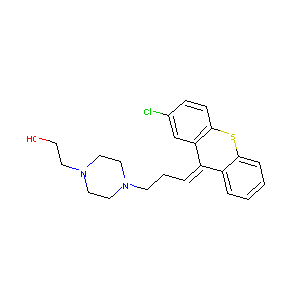

In [14]:
target = [Chem.MolFromSmiles(target) for target in target_results]
matches = []
for t in target_results:
    for smiles, score in target_results[t]:
        matches.append(Chem.MolFromSmiles(smiles))
Draw.MolsToImage(target, subImgSize=(300,300) )

# Most Similar

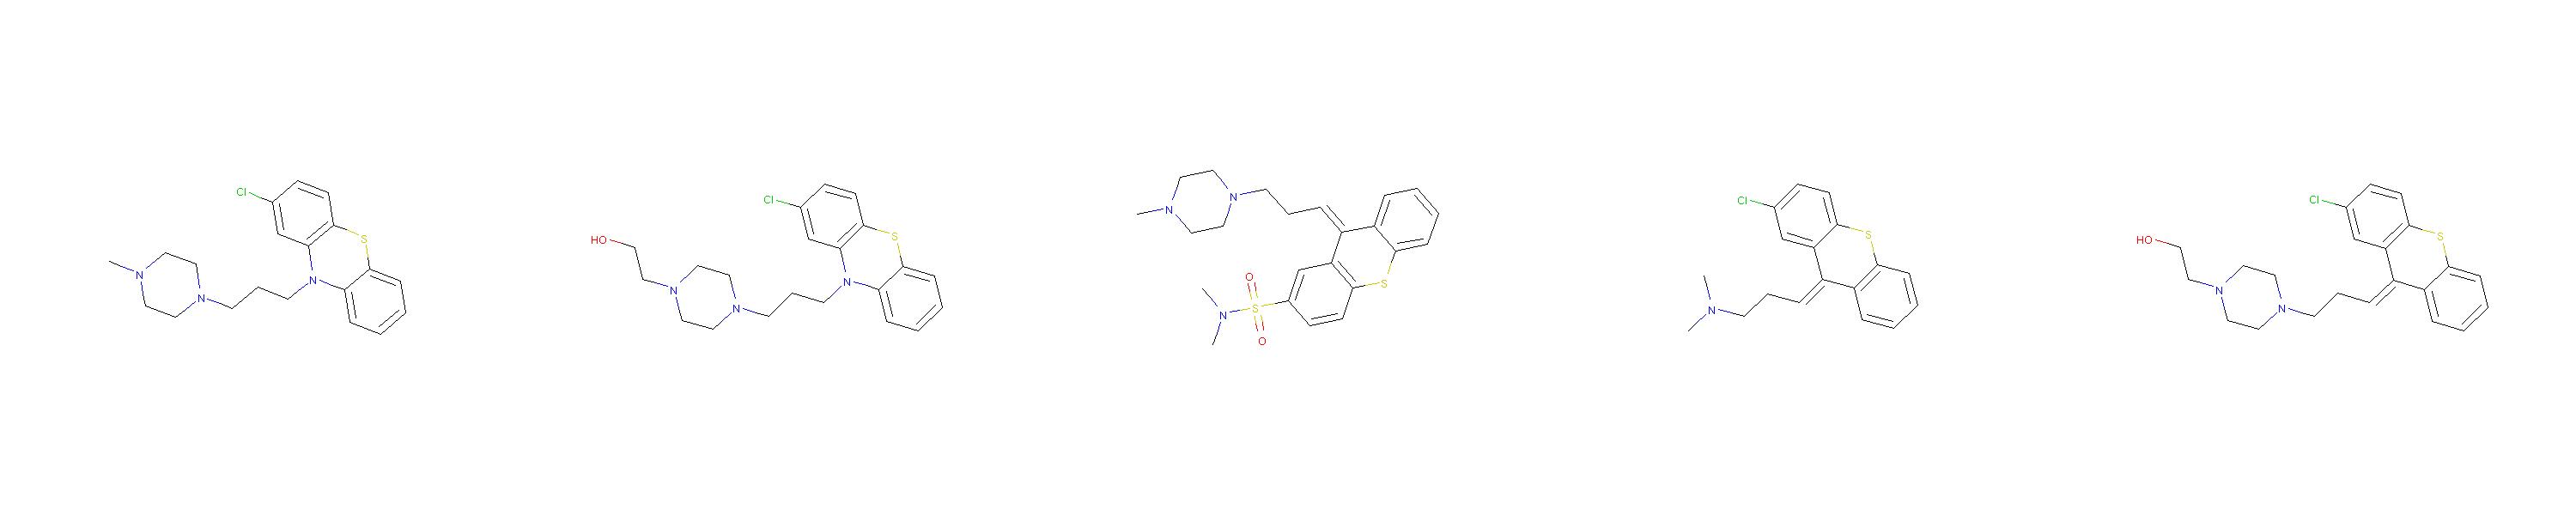

In [15]:
Draw.MolsToImage(matches, subImgSize=(600,600))